In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# Define the paths to your image and csv folders
train_val_dir = "C:\\Users\\nitch\\Downloads\\charts\\charts\\train_val"
test_dir = "C:\\Users\\nitch\\Downloads\\charts\\charts\\test"
train_path_labels = "C:\\Users\\nitch\\Downloads\\charts\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [22]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
        
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
# img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
    
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [23]:
x_train.shape

(1000, 128, 128, 3)

In [24]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [25]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
# img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [26]:
x_test.shape

(50, 128, 128, 3)

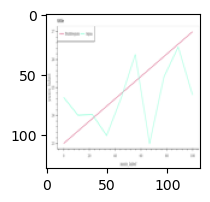

In [27]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [28]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [29]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

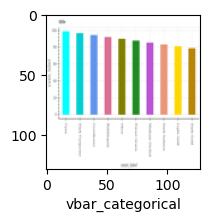

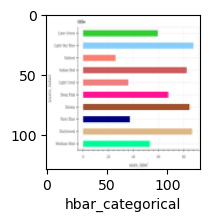

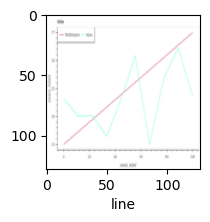

In [30]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [31]:
# now we have mapped the corresponding labels to the image

In [32]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [33]:
x_test.shape

(1000, 128, 128, 3)

In [34]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [35]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [36]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 19s 548ms/step - loss: 6.6838 - accuracy: 0.2120
Epoch 2/10
32/32 [==============================] - 18s 554ms/step - loss: 1.6290 - accuracy: 0.2180
Epoch 3/10
32/32 [==============================] - 17s 533ms/step - loss: 1.6005 - accuracy: 0.2450
Epoch 4/10
32/32 [==============================] - 22s 689ms/step - loss: 1.5838 - accuracy: 0.2650
Epoch 5/10
32/32 [==============================] - 18s 568ms/step - loss: 1.5583 - accuracy: 0.2740
Epoch 6/10
32/32 [==============================] - 21s 652ms/step - loss: 1.5839 - accuracy: 0.2530
Epoch 7/10
32/32 [==============================] - 20s 616ms/step - loss: 1.5855 - accuracy: 0.2730
Epoch 8/10
32/32 [==============================] - 19s 585ms/step - loss: 1.5989 - accuracy: 0.2280
Epoch 9/10
32/32 [==============================] - 18s 558ms/step - loss: 1.5885 - accuracy: 0.2350
Epoch 10/10
32/32 [==============================] - 18s 560ms/step - loss: 1.5910 - accura

In [37]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [38]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 105ms/step - loss: 1.6025 - accuracy: 0.1750


[1.602516531944275, 0.17499999701976776]

In [39]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 102ms/step


In [40]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [41]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 1.6097 - accuracy: 0.2013 - val_loss: 2.3594 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 7s 7s/step - loss: 2.2107 - accuracy: 0.2087 - val_loss: 1.7122 - val_accuracy: 0.1900
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 1.7192 - accuracy: 0.2025 - val_loss: 1.6362 - val_accuracy: 0.1900
Epoch 4/50
1/1 [==============================] - 6s 6s/step - loss: 1.6765 - accuracy: 0.2025 - val_loss: 1.6000 - val_accuracy: 0.2650
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 1.6273 - accuracy: 0.2912 - val_loss: 1.5834 - val_accuracy: 0.3600
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 1.6041 - accuracy: 0.3562 - val_loss: 1.5743 - val_accuracy: 0.3350
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 1.5889 - accuracy: 0.3063 - val_loss: 1.5683 - val_accuracy: 0.2900
Epoch 8/50
1/1 [=========================

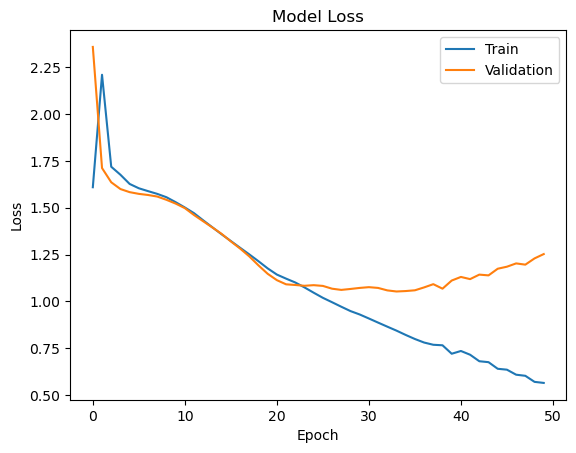

In [42]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [43]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 75ms/step - loss: 1.2526 - accuracy: 0.6100


[1.252589464187622, 0.6100000143051147]

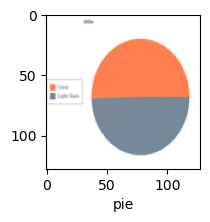

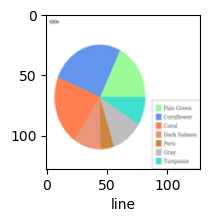

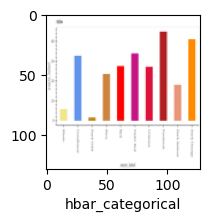

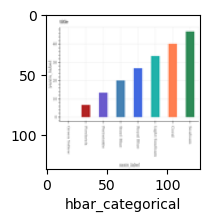

In [44]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [45]:
# Observation: we can see some wrong predictions

In [46]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 75ms/step


array([[5.6217372e-01, 1.8471560e-01, 1.9288403e-01, 1.6726159e-02,
        4.3500535e-02],
       [2.5477356e-01, 1.0227286e-01, 2.6183179e-02, 4.0941525e-02,
        5.7582891e-01],
       [2.8241393e-01, 5.0270711e-03, 1.0183922e-02, 2.4577165e-03,
        6.9991738e-01],
       [8.1303036e-01, 1.7617774e-07, 9.6203276e-04, 1.0312275e-02,
        1.7569521e-01],
       [6.2706178e-01, 9.3750648e-02, 2.3359419e-01, 1.2639252e-02,
        3.2954071e-02]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [48]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [49]:
# here we see some values are not matching

'dot_line'

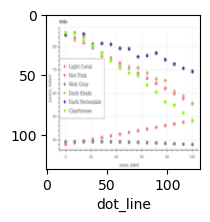

In [50]:
# test actual and predicted

# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted

# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted

image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [51]:
# some values are not matching

In [52]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.45      0.65      0.53        37
           1       0.85      0.77      0.81        44
           2       0.70      0.44      0.54        48
           3       0.43      0.55      0.48        33
           4       0.71      0.66      0.68        38

    accuracy                           0.61       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.65      0.61      0.62       200



In [53]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)

print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[24  3  0  3  7]
 [ 7 34  1  2  0]
 [12  0 21 15  0]
 [ 1  3  8 18  3]
 [ 9  0  0  4 25]]


Text(95.72222222222221, 0.5, 'Actual')

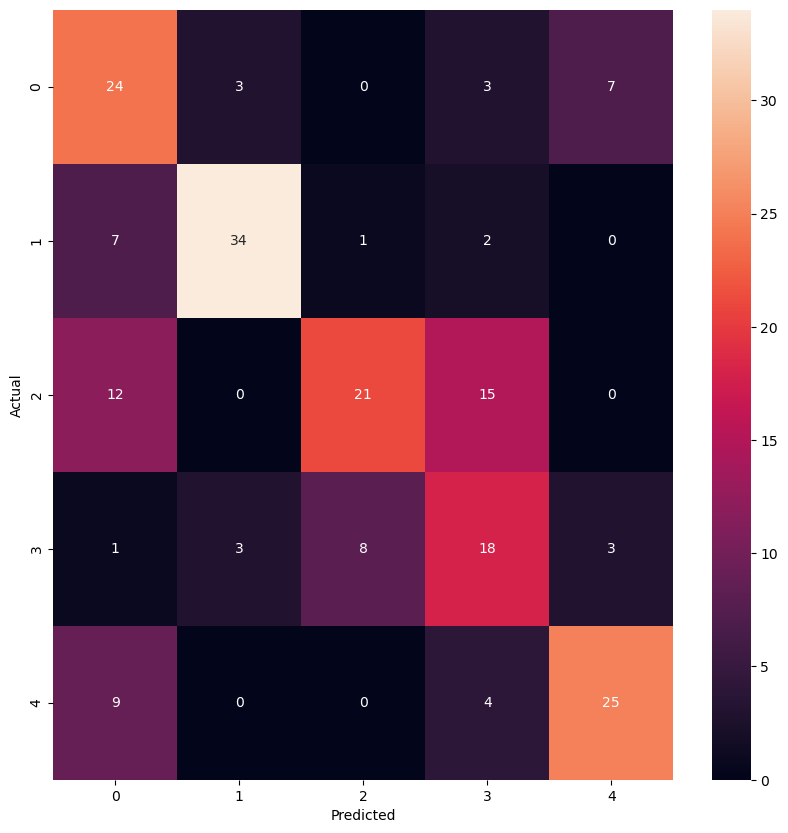

In [54]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [55]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [56]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [57]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)

predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [58]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
    layer.trainable = False

In [59]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [61]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [62]:
# flow method generates batches of augmented data

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [63]:
# Train the model with early stopping

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\nitch\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
